<a href="https://colab.research.google.com/github/Neallaz/Machine-Learning/blob/main/Customer%20Churn%20Prediction%20(Tabular%20Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt


In [33]:
url = "https://raw.githubusercontent.com/Neallaz/Machine-Learning/main/src/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Preview
print(df.head())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [34]:
# Drop customerID column
df.drop('customerID', axis=1, inplace=True)

# Convert TotalCharges to numeric (coerce errors to NaN)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Fill missing TotalCharges with median
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())


In [35]:
le = LabelEncoder()

# Encode target variable 'Churn'
df['Churn'] = le.fit_transform(df['Churn'])  # Yes=1, No=0

# Columns with binary categories to label encode
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'gender']
binary_cols = [col for col in binary_cols if col in df.columns]

for col in binary_cols:
    df[col] = le.fit_transform(df[col])

# One-hot encode remaining categorical columns
cat_cols = df.select_dtypes(include='object').columns
to_one_hot = [col for col in cat_cols if col not in binary_cols]

df = pd.get_dummies(df, columns=to_one_hot, drop_first=True)


In [36]:
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [37]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [38]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [39]:
y_pred = clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[933 103]
 [151 222]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



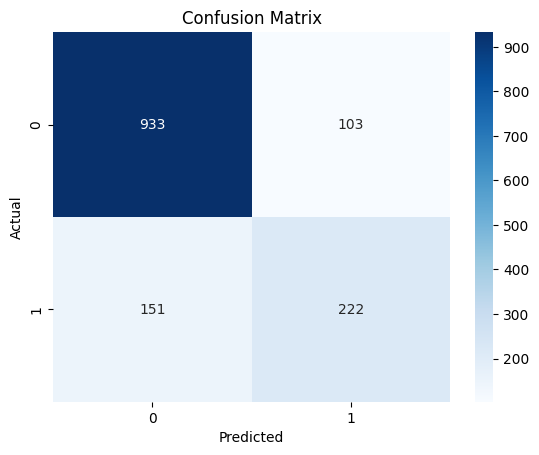

In [40]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
